<a href="https://colab.research.google.com/github/jjcrofts77/Advanced-Calculus-MATH20471/blob/main/content/notebooks/Part2/Chapter1/ComplexFunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Functions of a complex variable

Functions of a complex variable work in an analogous way to functions which operate on real numbers.

>**Definition 1.2.1** A function of a complex variable $f(z)$ (where $z=x+iy$) maps $z$ onto another complex variable $w=u+iv$. In general, we write:

$$
	w= f(z)=u(x,y)+iv(x,y)
$$

Revisiting the examples from previously:

1. if $f(z)=z^2$, then 

	$$f(z) = (x+iy)^2 = (x^2-y^2)+i2xy$$ 

	and so 

	$$ u=x^2-y^2 \quad\& \quad v=2xy$$

2. if $f(z)=\overline{z}$ then

	$$f(z) = \overline{x+iy}=x-iy$$ 
  
	and so 
  
	$$u=x\quad \& \quad v=-y.$$

Another way to think about a function is as a mapping from the Argand plane representing the independent variable $z$ onto the Argand plane representing the dependent variable $w$ (see figure below).

For example, under the mapping $w=f(z)$ where $f(z)=z^2$, we obtain:

$$
	z&=0+0i \longrightarrow w=0+0i,\\
	z&=1+0i \longrightarrow w=1+0i,\\
	z&=0+i \longrightarrow w=-1+0i,\\
	z&=3+4i \longrightarrow w=-7+i24,
$$

All the standard theorems of continuity of functions apply in the complex plane. For example, if two functions $f_1$ and $f_2$ are continuous in a complex set $X$ then,

$$
	f_1+f_2,\ f_1f_2,\ \tfrac{f_1}{f_2},
$$

are continuous in $X$.

```{figure} ../../../images/ComplexMapping.png
---
height: 250px
---
A complex function $f$ as a mapping between $z=x+iy$ and $w=u(x,y)+iv(x,y)$
```

## Visualising complex functions
Some thought is required if we wish to represent a complex function visually since we require a four dimensional space! This follows since complex functions map points from the complex plane to the complex plane. 

For visualisation purposes we typically plot either 

 - the magnitude $|f(z)|$ versus $z$; or
 - the real or imaginary parts of $z$ as a function of $z$.

Below we plot the magnitude, of one of the most 'famous' complex-valued functions, the *gamma function*, which can be written mathematically as

````{margin}
```{note}
Other formulations are possible, see, for example, the [MathWorld page](https://mathworld.wolfram.com/GammaFunction.html) on the topic.
```
````

$$
\Gamma(z) = \int_0^∞ t^{z-1} e^{-t}\mathrm{d}t.
$$

The plot below is produced using python (click tab for code) and shows $|\Gamma(z)|$ on the domain $[-4,4]^2$.

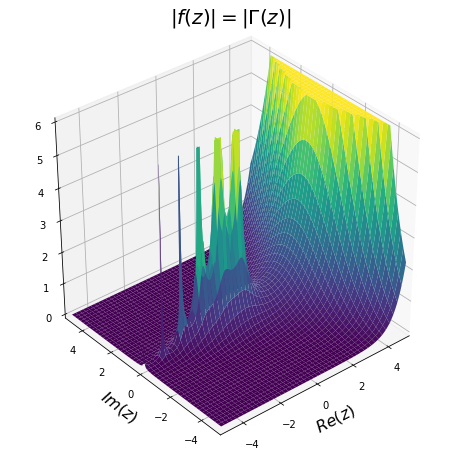

In [ ]:
# setup for plotting complex functions 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot on grid [-lim,lim]^2
N = 1000
lim = 5

x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

# plot the gamma function
from scipy.special import gamma

f = abs(gamma(z)) # plot bsolute value of gamma(z)
f[f>6] = 6 # handle singularities

fig = plt.figure(figsize=(8,8)) # figure size
ax = fig.add_subplot(111, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim), zlim=(0,6))

ax.plot_surface(x, y, f, cmap="viridis", shade=True, alpha=1)
ax.set_xlabel("$Re(z)$", size=16)
ax.set_ylabel("$Im(z)$", size=16)
ax.set_title("$|f(z)|=|\Gamma (z)|$", size=20, pad=30,weight='bold')
ax.view_init(azim=-130, elev=35)

plt.show()

As noted above we can also plot the real and imaginary parts of a complex-valued function. Below we plot the absolute value of the real part of the function

$$
f(z) = e^z = e^x(\cos(y)+i\sin(y)).
$$

Note that, as expected, the function increases monotonically along the real axis, whilst it is periodic along the imaginary axis.

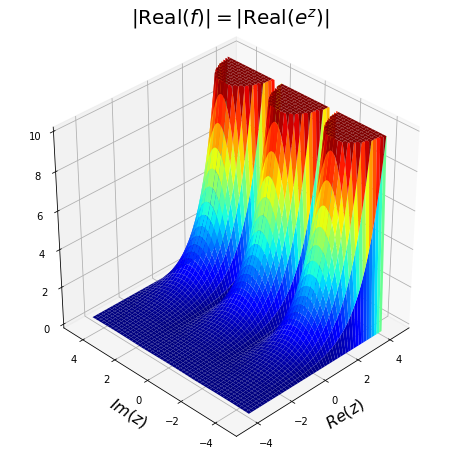

In [ ]:
# real and imaginary parts of the Gamma function

x, y = np.meshgrid(np.linspace(-4,4,N),
                   np.linspace(-3*np.pi/2,3*np.pi/2,N))
z = x + 1j*y

f = np.exp(z) # plot bsolute value of gamma(z)
f = abs(f.real)
f[f>10] = 10 # handle singularities

fig = plt.figure(figsize=(8,8)) # figure size
ax = fig.add_subplot(111, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim), zlim=(0,10))

ax.plot_surface(x, y, f, cmap="jet", shade=True, alpha=1)
ax.set_xlabel("$Re(z)$", size=16)
ax.set_ylabel("$Im(z)$", size=16)
ax.set_title("$|\mathrm{Real}(f)|=|\mathrm{Real}(e^z)|$", size=20, pad=30,weight='bold')
ax.view_init(azim=-135, elev=35)

plt.show()

```{note}
Other more imaginative methods such as the domain colouring technique exist, which colours the polar form representation of our function. ( See below for an illustration of this method for the functions

$$
 f_1 = \frac{e^z}{z} \quad \text{and} \quad f_2 = \frac{\sin(z)}{z}.
$$

For further details see [here](https://en.wikipedia.org/wiki/Domain_coloring)
```

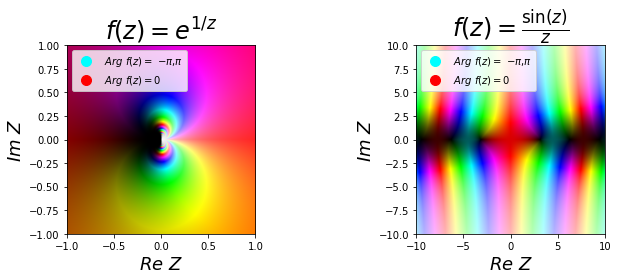

In [ ]:
from colorsys import hls_to_rgb


def colorize(fz):

    """
    The original colorize function can be found at:
    https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
    by the user nadapez.
    """
    
    r = np.log2(1. + np.abs(fz))
    
    h = np.angle(fz)/(2*np.pi)
    l = 1 - 0.45**(np.log(1+r)) 
    s = 1

    c = np.vectorize(hls_to_rgb)(h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (m,n,3)
    c = np.rot90(c.transpose(2,1,0), 1) # Change shape to (m,n,3) and rotate 90 degrees
    
    return c


# exp(z)/z
lim = 1
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

f = np.exp(1/z)

fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,4))
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=18)
ax.set_ylabel("$Im$ $Z$", fontsize=18)
ax.set_title(r"$f(z)=e^{1/z}$", fontsize=24)


# sin(z)/z

lim = 10
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

f = np.sin(z)/z

ax2.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax2.imshow(img, extent=[-lim,lim, -lim,lim])
ax2.set_xlabel("$Re$ $Z$", fontsize=18)
ax2.set_ylabel("$Im$ $Z$", fontsize=18)
ax2.set_title(r"$f(z)=\frac{\sin(z)}{z}$", fontsize=24)

plt.tight_layout()
plt.show()